In [1]:
import os
import csv
from datetime import date, datetime
import yaml
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from experiment.toolkits.plotting_helper import *

project_dir = Path().resolve().parents[0]
sys.path.insert(0, str(project_dir))
from modules.camera.andor_ixonultra888.andor_ixonultra888 import AndoriXonUltra888
from time import sleep
import pickle
import datetime
from scipy.stats import linregress

IMPORTED ATMCD


In [2]:
home = os.path.expanduser("~") 
os.chdir(home + "/LLRS")

In [3]:
base_cmd = "./bin/modules/image-acq/test-img-acq"
def get_acq_time (rx, ry, hb, vb, reps, fgc_timtout):
    command = base_cmd + " -rx " + str(rx) + " -ry " + str(ry) + ' -hb ' + str(hb) + ' -vb ' + str(vb) + " -n " + str(reps) + " -fgct " + str(round(fgc_timtout))
    return os.popen(command).read()

In [10]:
camera = AndoriXonUltra888()
camera.open_connection()

User path is  None


In [11]:
static_prop_path = home + "/LLRS/configs/emccd/andor_static_properties.yml"
acquisition_prop_path = home + "/LLRS/configs/emccd/andor_acquisition_properties.yml"

with open(static_prop_path, "r") as static_prop_file:
    static_prop_dict = yaml.safe_load(static_prop_file)

with open(acquisition_prop_path, "r") as acquisition_prop_file:
    acquisition_prop_dict = yaml.safe_load(acquisition_prop_file)

camera.set_static_properties(static_prop_dict)
camera.set_acquisition_properties(acquisition_prop_dict)

SetTemperature with status 20002
Camera temp range returned  20002  with low  -120  and max  20
Camera temperature set to 0 with status  20002
Cooler on with status  20002
Camera temp returned  20037  with value  1.4900000095367432
SetEMGainMode on with status  20002
SetEMAdvanced with status 20002
Camera gain range returned  20002  with low  1  and max  4095
EMCCD gain set  0 with status 20002
Function SetTriggerMode returned 20002 mode = External
Function SetFrameTransferMode returned 20002
Function SetBaselineClamp returned 20002
Function SetCameraLinkMode returned 20002
Function SetCoolerMode returned 20002
Function SetFanMode returned 20002
Attempting to change settings {'temperature': 0, 'block_until_temperature_stabilized': False, 'em_gain_mode': 1, 'em_advanced': 1, 'em_gain': 0, 'frametransfer_mode': 1, 'trigger_mode': 1, 'baseline_clamp': 1, 'cameralink_mode': 1, 'cooler_mode': 1, 'fan_mode': 2}
Function SetAcquisitionMode returned 20002
Function SetReadMode returned 20002 mo

In [59]:
reps = 10
roi_heights = list(range(16, 1025, 32))
time_data = np.full((len(roi_heights), reps), np.nan)
fgc_timeout = camera.sdk.GetAcquisitionTimings()[1] * 1e3 + 10 # Retrieves the exposure time in ms

for i in range(len(roi_heights)):
    print(f"{i}/{len(roi_heights)}")

    height = roi_heights[i]

    camera.sdk.SetIsolatedCropModeEx(
        1,
        height,
        1024,
        1,
        1,
        1,
        1
    )

    camera.listen_for_hardware_trigger()

    acq_time_str = get_acq_time(1024,
                                height, 
                                1,
                                1,
                                reps,
                                fgc_timeout)

    camera.stop_listening_for_hardware_trigger()

    acq_time_list = [int(num) for num in acq_time_str.strip().split(",") if num]

    time_data[i, :] = np.array(acq_time_list)

0/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
1/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
2/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
3/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
4/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
5/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
6/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
7/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
8/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
9/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
10/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
11/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
12/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
13/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
14/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
15/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
16/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
17/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
18/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
19/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
20/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
21/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
22/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
23/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
24/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
25/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
26/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
27/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
28/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
29/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
30/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002
31/32


ERROR REPORTED by PHX Default Error Handler : 
FBD_GetFpgaModelInfo:  Failed with error code 0x00000008.


"Info Not Found for Board Type "FBD-1XCLD:2PE4L""

(Phoenix Library v8.38.00)
ERROR REPORTED by PHX Default Error Handler : 
FBD_FirmwareRevisionCheck:  Failed with error code 0x00000000.


"Board Contains Firmware [2.21.0] - DLL Contains Firmware [0.0.0]
Please Update Board Firmware with FbdProg"

(Phoenix Library v8.38.00)


AbortAcquisition returned 20002


# Save results

In [60]:
# Saving the results 
file_name = datetime.datetime.now().strftime("%Y-%m-%d, %H-%M-%S.pickle")
with open(os.path.join(home, "LLRS", "resources", "image_acquisition_characterization", file_name), "wb") as file:
    pickle.dump(
        {
            "xvals": roi_heights,
            "experiment": file_name,
            "data": time_data
        }, file
        )

# Load results

In [61]:
load_latest = True
if not load_latest:
    file_name = "2024-04-22, 19-04-01.pickle"

with open(os.path.join(home, "LLRS", "resources", "image_acquisition_characterization", file_name), "rb") as file:
    data = pickle.load(file)
    roi_heights = np.array(data["xvals"])
    time_data = data["data"]
    title = data["experiment"]

In [62]:
def theoretical_acquistion_time_oct3(T_exposure=0.02, f_v=1/4.33e-6, f_h=30e6, f_PCIe=1.784e9, f_link=6.1e9, S_y=1039, 
                                    N_D=468, N_G=604, N_O=16, W=1024, H=1024, S_h=1056, bin_v=1, flag_dma=True):
    T_transfer = S_y/f_v + H/f_v * sum([1/(2**i)for i in range(1, int(np.log2(bin_v)))])
    T_horshift = H/bin_v * (1/f_v + (S_h + N_O - 1024 + W)/f_h)
    T_register = (N_D + N_G)/f_h
    T_dma = (H/bin_v * W * 2) / f_PCIe
    return T_exposure + T_transfer + T_horshift + T_register + T_dma * flag_dma

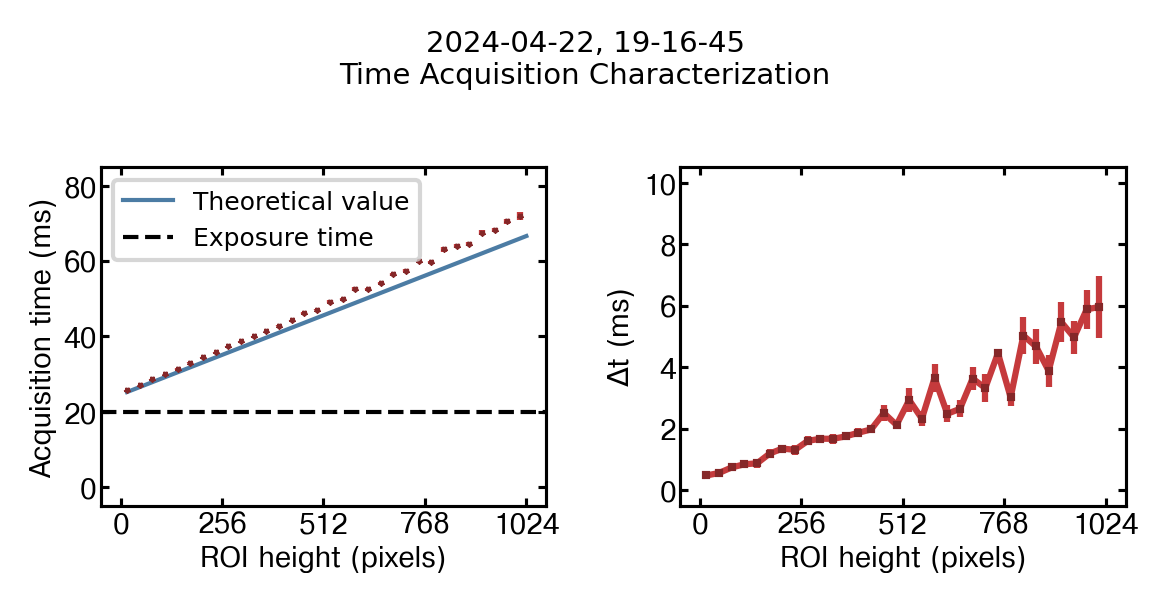

In [63]:
acq_time_mean = time_data.mean(axis = 1)
acq_time_std = time_data.std(axis = 1)

fig, ax = getStylishFigureAxes(1, 2, dpi=300)

ErrorbarPlotter(
    fig,
    ax[0],
    roi_heights,
    acq_time_mean / 1e6,
    yerr = acq_time_std / 1e6,
    style = {"marker": "*", "linestyle": "None", "markersize": 1},
    xlim = [-50, 1074],
    ylim = [-5, 85],
    xticks = [0, 256, 512, 768, 1024],
    yticks = [0, 20, 40, 60, 80],
    xlabel = "ROI height (pixels)",
    ylabel = "Acquisition time (ms)"
).draw()

xvals = np.linspace(16, 1024, 100)
yvals = np.array([theoretical_acquistion_time_oct3(W = 1024, H = x) for x in xvals])
PlotPlotter(
    fig,
    ax[0],
    xvals,
    yvals * 1e3,
    style = {"linestyle": "-", "lw": 1, "label": "Theoretical value"},
).draw()

ax[0].axhline(20, linestyle = "--", linewidth = 1, color = "black", label = "Exposure time")
ax[0].legend(fontsize=6)

yvals = np.array([theoretical_acquistion_time_oct3(W = 1024, H = x) for x in roi_heights])
ErrorbarPlotter(
    fig,
    ax[1],
    roi_heights,
    acq_time_mean / 1e6 - yvals * 1e3,
    yerr = acq_time_std / 1e6,
    ylim = [-0.5, 10.5],
    yticks = [0, 2, 4, 6, 8, 10],
    xlim = [-50, 1074],
    xticks = [0, 256, 512, 768, 1024],
    style = {"linestyle": "-", "marker": "s", "markersize": 1},
    xlabel = "ROI height (pixels)",
    ylabel = "$\Delta$t (ms)",
).draw()

plt.suptitle(f"{title.split('.')[0]}\nTime Acquisition Characterization", fontsize=7)
plt.tight_layout()
plt.savefig("result.jpg")
plt.show()

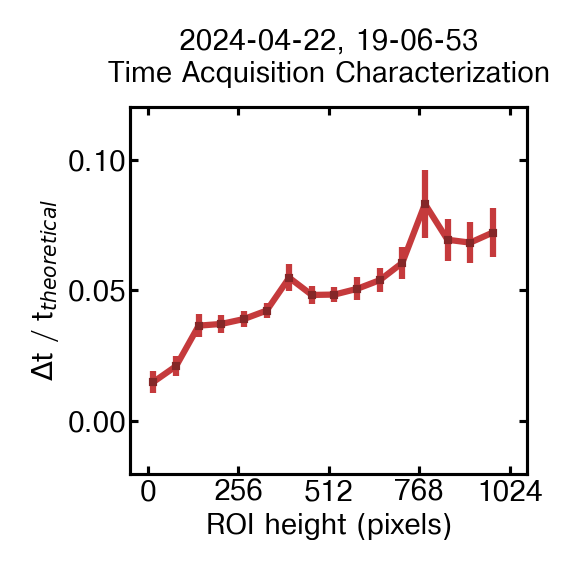

In [26]:
acq_time_mean = time_data.mean(axis = 1)
acq_time_std = time_data.std(axis = 1)

fig, ax = getStylishFigureAxes(1, 1, dpi=300)

yvals = np.array([theoretical_acquistion_time_oct3(W = 1024, H = x) for x in roi_heights])
ErrorbarPlotter(
    fig,
    ax,
    roi_heights,
    (acq_time_mean / 1e6 - yvals * 1e3) / (yvals * 1e3),
    yerr = acq_time_std / 1e6 / (yvals * 1e3),
    ylim = [-0.02, 0.12],
    yticks = [0, 0.05, 0.1],
    xlim = [-50, 1074],
    xticks = [0, 256, 512, 768, 1024],
    style = {"linestyle": "-", "marker": "s", "markersize": 1},
    xlabel = "ROI height (pixels)",
    ylabel = "$\Delta$t / t${}_{theoretical}$",
).draw()

ax.set_title(f"{title.split('.')[0]}\nTime Acquisition Characterization", fontsize=7)
plt.tight_layout()
plt.savefig("result.jpg")
plt.show()

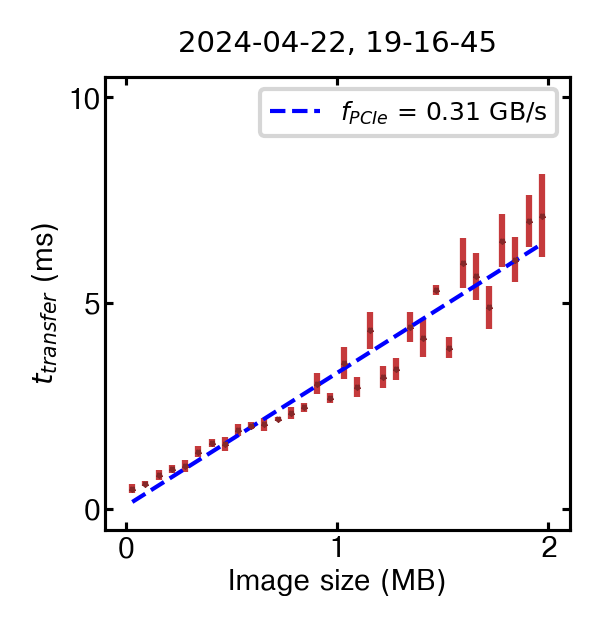

In [123]:
acq_time_mean = time_data.mean(axis = 1) / 1e6
thr_acquisition_time = np.array([theoretical_acquistion_time_oct3(H=h, flag_dma=False)*1000 for h in roi_heights])
acq_time_std = time_data.std(axis = 1)

xvals = roi_heights / 1024 * 2
yvals = acq_time_mean - thr_acquisition_time
result = linregress(xvals, yvals)

fig, ax = getStylishFigureAxes(1, 1, axes_list=True, dpi=300)
ErrorbarPlotter(
    fig,
    ax[0],
    xvals,
    yvals,
    yerr = acq_time_std / 1e6,
    style = {"marker": "*", "linestyle": "None", "markersize": 1},
    xlim = [-0.1, 2.1],
    xticks = [0, 1, 2],
    xlabel = "Image size (MB)",
    ylabel = "$t_{transfer}$ (ms)",
    ylim = [-0.5, 10.5],
    yticks = [0, 5, 10],
    title = title.split(".")[0]
).draw()

PlotPlotter(
    fig,
    ax[0],
    xvals,
    xvals * result.slope + result.intercept,
    style = {"linestyle" : "--", "color": "blue", "lw": 1,
             "label": "$f_{PCIe}$ = " + f"{str(round(1 / result.slope, 2))} GB/s"}
).draw()

ax[0].legend(fontsize=6)
plt.savefig("result.jpg")
plt.show()

In [ ]:
camera.close_connection()